# Regression with an Abalone Dataset

Bu projede bazı ölçüler kullanılarak yüzük numarasını tahmin eden derin öğrenme regression modeli geliştirilmiştir.

Projede kullanılan veriler [buradan](https://www.kaggle.com/datasets/zhhwaazai/regression-with-an-abalone-dataset) elde edilmiştir.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [4]:
test.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              60411 non-null  int64  
 1   Sex             60411 non-null  object 
 2   Length          60411 non-null  float64
 3   Diameter        60411 non-null  float64
 4   Height          60411 non-null  float64
 5   Whole weight    60411 non-null  float64
 6   Whole weight.1  60411 non-null  float64
 7   Whole weight.2  60411 non-null  float64
 8   Shell weight    60411 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.1+ MB


In [7]:
train.describe()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,45307.000000,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,26158.441658,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,22653.500000,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,45307.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,67960.500000,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,90614.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
train.corr(numeric_only=True)

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
id,1.000000,0.004724,0.004290,0.005916,0.005228,0.004203,0.004878,0.005887,0.000938
Length,0.004724,1.000000,0.989732,0.916094,0.931449,0.909609,0.913134,0.911073,0.623786
Diameter,0.004290,0.989732,1.000000,0.919618,0.933848,0.908466,0.914668,0.917871,0.636832
Height,0.005916,0.916094,0.919618,1.000000,0.902344,0.861769,0.886132,0.904019,0.665772
Whole weight,0.005228,0.931449,0.933848,0.902344,1.000000,0.971249,0.974319,0.964201,0.617274
Whole weight.1,0.004203,0.909609,0.908466,0.861769,0.971249,1.000000,0.949227,0.911800,0.515067
Whole weight.2,0.004878,0.913134,0.914668,0.886132,0.974319,0.949227,1.000000,0.937069,0.588954
Shell weight,0.005887,0.911073,0.917871,0.904019,0.964201,0.911800,0.937069,1.000000,0.694766
Rings,0.000938,0.623786,0.636832,0.665772,0.617274,0.515067,0.588954,0.694766,1.000000


<Axes: >

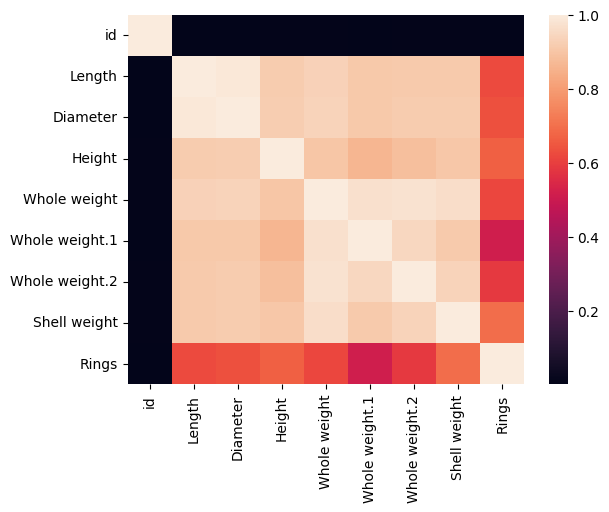

In [9]:
sns.heatmap(train.corr(numeric_only=True))

In [18]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [47]:
x=train.drop(["id", "Rings"], axis=1)
y=train[["Rings"]]
x=pd.get_dummies(x, drop_first=True)

In [48]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          90615 non-null  float64
 1   Diameter        90615 non-null  float64
 2   Height          90615 non-null  float64
 3   Whole weight    90615 non-null  float64
 4   Whole weight.1  90615 non-null  float64
 5   Whole weight.2  90615 non-null  float64
 6   Shell weight    90615 non-null  float64
 7   Sex_I           90615 non-null  bool   
 8   Sex_M           90615 non-null  bool   
dtypes: bool(2), float64(7)
memory usage: 5.0 MB


In [49]:
x=np.array(x)

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [56]:
model=Sequential()
model.add(Dense(64, activation="relu", input_shape=(9,)))
model.add(Dense(16, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])

In [57]:
x_train = x_train.astype(np.float32)
y_train = y_train.astype(np.float32)
x_test = x_test.astype(np.float32)
y_test = y_test.astype(np.float32)

In [58]:
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=10, verbose=1) 
#verbose: aşağıdaki ilerlemeler görünsün mü?

Epoch 1/10
567/567 [==============================] - 5s 9ms/step - loss: 14.8290 - mae: 2.5354 - val_loss: 5.4996 - val_mae: 1.5858
Epoch 2/10
567/567 [==============================] - 5s 8ms/step - loss: 4.6423 - mae: 1.4906 - val_loss: 4.2887 - val_mae: 1.4175
Epoch 3/10
567/567 [==============================] - 5s 8ms/step - loss: 3.9624 - mae: 1.3707 - val_loss: 4.0702 - val_mae: 1.3512
Epoch 4/10
567/567 [==============================] - 5s 8ms/step - loss: 3.8570 - mae: 1.3516 - val_loss: 3.9766 - val_mae: 1.3634
Epoch 5/10
567/567 [==============================] - 5s 8ms/step - loss: 3.8260 - mae: 1.3485 - val_loss: 3.9439 - val_mae: 1.3931
Epoch 6/10
567/567 [==============================] - 5s 8ms/step - loss: 3.7727 - mae: 1.3354 - val_loss: 3.8704 - val_mae: 1.3467
Epoch 7/10
567/567 [==============================] - 5s 8ms/step - loss: 3.7427 - mae: 1.3298 - val_loss: 3.8455 - val_mae: 1.3419
Epoch 8/10
567/567 [==============================] - 5s 8ms/step - loss: 3

In [59]:
tahmin=model.predict(x_test)

567/567 [==============================] - 1s 2ms/step


In [60]:
r2_score(y_test, tahmin)

0.6327717765774465

In [62]:
xt=test.drop("id", axis=1)
xt=pd.get_dummies(xt, drop_first=True)
xt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          60411 non-null  float64
 1   Diameter        60411 non-null  float64
 2   Height          60411 non-null  float64
 3   Whole weight    60411 non-null  float64
 4   Whole weight.1  60411 non-null  float64
 5   Whole weight.2  60411 non-null  float64
 6   Shell weight    60411 non-null  float64
 7   Sex_I           60411 non-null  bool   
 8   Sex_M           60411 non-null  bool   
dtypes: bool(2), float64(7)
memory usage: 3.3 MB


In [63]:
xt=np.array(xt)
xt = xt.astype(np.float32)

In [64]:
pred=model.predict(xt)

1888/1888 [==============================] - 4s 2ms/step


In [70]:
test["Rings"]=np.round(pred)
test["Rings"]=test["Rings"].astype(np.int32)

In [71]:
test.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,9
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,10
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,10
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,11
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,8


In [73]:
test[["id", "Rings"]].to_csv("submission.csv", index=False)

## Sonuç


Bu projede bazı ölçüler kullanılarak yüzük numarasını tahmin eden derin öğrenme regression modeli geliştirilmiştir. Geliştirilen derin öğrenme modelinde %63 gibi oldukça düşük bir başarı elde edilmiştir. Model üzerinde çeşitli parametre ayarlamaları yapılarak başarı arttırılabilir.